IMPORTS

In [116]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import LogisticRegression as logi
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier as Ext
from sklearn.preprocessing import LabelEncoder
import joblib as jb
from sklearn import datasets
from sklearn import preprocessing as ppr
from sklearn.tree import DecisionTreeClassifier as dt

DATASET LOAD

In [117]:
df=pd.read_csv("/content/drive/MyDrive/ml/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


DATA ANALYSIS

In [118]:
eval=df.groupby('Survived').mean()
eval

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


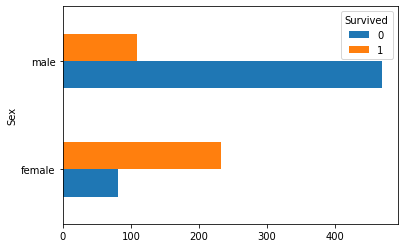

In [119]:
pd.crosstab(df.Sex,df.Survived).plot(kind='barh')
plt.show()

In [120]:
eval2=df.groupby('Cabin').agg(["mean","count"])
eval2

PassengerId       Survived        ... Parch             Fare      
             mean count     mean count  ...  mean count       mean count
Cabin                                   ...                             
A10         584.0     1      0.0     1  ...  0.00     1  40.125000     1
A14         476.0     1      0.0     1  ...  0.00     1  52.000000     1
A16         557.0     1      1.0     1  ...  0.00     1  39.600000     1
A19         285.0     1      0.0     1  ...  0.00     1  26.000000     1
A20         600.0     1      1.0     1  ...  0.00     1  56.929200     1
...           ...   ...      ...   ...  ...   ...   ...        ...   ...
F33         310.0     3      1.0     3  ...  0.00     3  11.333333     3
F38         777.0     1      0.0     1  ...  0.00     1   7.750000     1
F4          401.5     2      1.0     2  ...  1.00     2  39.000000     2
G6          216.0     4      0.5     4  ...  1.25     4  13.581250     4
T           340.0     1      0.0     1  ...  0.00     1  35.500000     1

[147 rows x 14 columns]

DATA CLEANING AND PROCESSING

In [121]:
df=df.drop(["PassengerId","Cabin","Name","Ticket","Embarked","Parch","SibSp"],axis=1)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [122]:
ageMean=math.floor(df.Age.mean())
df=df.fillna(value={'Age':ageMean})
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,29.0,23.4500
889,1,1,male,26.0,30.0000


In [123]:
df.isnull().values.any()

False

In [124]:
df2=pd.get_dummies(df.Sex)
df=pd.concat([df,df2],axis=1)
df

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,1
887,1,1,female,19.0,30.0000,1,0
888,0,3,female,29.0,23.4500,1,0
889,1,1,male,26.0,30.0000,0,1


In [125]:
df3=pd.get_dummies(df.Pclass)
df=pd.concat([df,df3],axis=1)
df

,Survived,Pclass,Sex,Age,Fare,female,male,1,2,3
0,0,3,male,22.0,7.2500,0,1,0,0,1
1,1,1,female,38.0,71.2833,1,0,1,0,0
2,1,3,female,26.0,7.9250,1,0,0,0,1
3,1,1,female,35.0,53.1000,1,0,1,0,0
4,0,3,male,35.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0,1,0,1,0
887,1,1,female,19.0,30.0000,1,0,1,0,0
888,0,3,female,29.0,23.4500,1,0,0,0,1
889,1,1,male,26.0,30.0000,0,1,1,0,0


In [126]:
df=df.drop(["Sex","Pclass"],axis=1)
df

,Survived,Age,Fare,female,male,1,2,3
0,0,22.0,7.2500,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,0
2,1,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,0,1,0,0
4,0,35.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,1,0,1,0
887,1,19.0,30.0000,1,0,1,0,0
888,0,29.0,23.4500,1,0,0,0,1
889,1,26.0,30.0000,0,1,1,0,0


TRAIN TEST SPLIT

In [140]:
Y=df.Survived
X=df.drop("Survived",axis=1)
Xtr,Xte,ytr,yte=tts(X,Y,test_size=0.1)
Xtr

,Age,Fare,female,male,1,2,3
336,29.0,66.6000,0,1,1,0,0
59,11.0,46.9000,0,1,0,0,1
638,41.0,39.6875,1,0,0,0,1
275,63.0,77.9583,1,0,1,0,0
373,22.0,135.6333,0,1,1,0,0
...,...,...,...,...,...,...,...
177,50.0,28.7125,1,0,1,0,0
29,29.0,7.8958,0,1,0,0,1
110,47.0,52.0000,0,1,1,0,0
207,26.0,18.7875,0,1,0,0,1


DATA SCALING

In [135]:
Xtr=ppr.scale(Xtr)
Xte=ppr.scale(Xte)
Xtr

array([[ 0.93910961, -0.49375944, -0.74521125, ..., -0.57302549,
        -0.50740204,  0.90807564],
       [ 0.47971483, -0.11881599, -0.74521125, ...,  1.74512307,
        -0.50740204, -1.10122985],
       [-0.05624575, -0.24661622, -0.74521125, ..., -0.57302549,
        -0.50740204,  0.90807564],
       ...,
       [-0.66877213,  4.57830247,  1.34190138, ...,  1.74512307,
        -0.50740204, -1.10122985],
       [-0.36250894,  0.18356111, -0.74521125, ..., -0.57302549,
         1.97082377, -1.10122985],
       [ 0.02032005, -0.22604932,  1.34190138, ..., -0.57302549,
         1.97082377, -1.10122985]])

MODEL CONSTRUCTION, TRAINING AND TESTING

In [141]:
model=dt()
model.fit(Xtr,ytr)
model.score(Xte,yte)

0.8222222222222222

DUMPING

In [142]:
jb.dump(model,'titanic_model')

['titanic_model']